In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Grid
nx = 101
xl, xr = 0., 100.
dx = (xr - xl) / nx

# Scheme
# 'ftcs', 'lf', 'lw'
scheme = 'lw'

# Output dir
# 'ftcs', 'lax-friedrich'
out_dir = 'lax-wendroff'

# I/O
times = range(1, 21, 4)

# Output mode: 'individual', 'superimpose'
out_mode = 'superimpose'

# show
show = True


In [3]:
# Grid
x = np.linspace(xl, xr, nx)

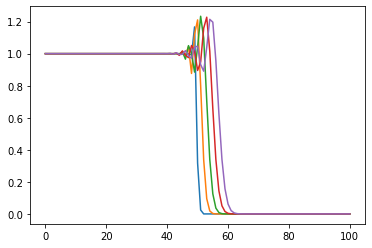

In [4]:
# Filename
fname = f'{out_dir}/{scheme}'

# Prepare combined figurefigure
if out_mode == 'superimpose':
    fig = plt.figure()

# Plot output files
for time in times:
    
    # Create individual figs
    if out_mode == 'individual':
        fig = plt.figure()
    
    # Get data
    tfstr = f'{time:0>4d}'
    data = np.fromfile(f'{fname}-{tfstr}.dat')
    
    # Plot
    plt.plot(x, data)
    
    # Save and close individual figs
    if out_mode == 'individual':
        plt.savefig(f'{fname}-{tfstr}.png', dpi=300)
        plt.savefig(f'{fname}-{tfstr}.pdf')
        plt.close(fig)
        
    
# Save and close combined figure 
if out_mode == 'superimpose':
    plt.savefig(fname + '.png', dpi=300)
    plt.savefig(fname + '.pdf')
    if not show:
        fig = plt.close(fig) 

    